# Airline Passenger Satisfaction

This dataset contains an airline passenger satisfaction survey. What factors are highly correlated to a satisfied (or dissatisfied) passenger? Can you predict passenger satisfaction? 


## Data

**Gender**: Gender of the passengers (Female, Male)

**Customer Type**: The customer type (Loyal customer, disloyal customer)

**Age**: The actual age of the passengers

**Type of Travel**: Purpose of the flight of the passengers (Personal Travel, Business Travel)

**Class**: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

**Flight distance**: The flight distance of this journey

**Inflight wifi service**: Satisfaction level of the inflight wifi service (0**:Not Applicable;1-5)

**Departure/Arrival time convenient**: Satisfaction level of Departure/Arrival time convenient

**Ease of Online booking**: Satisfaction level of online booking

**Gate location**: Satisfaction level of Gate location

**Food and drink**: Satisfaction level of Food and drink

**Online boarding**: Satisfaction level of online boarding

**Seat comfort**: Satisfaction level of Seat comfort

**Inflight entertainment**: Satisfaction level of inflight entertainment

**On-board service**: Satisfaction level of On-board service

**Leg room service**: Satisfaction level of Leg room service

**Baggage handling**: Satisfaction level of baggage handling

**Check-in service**: Satisfaction level of Check-in service

**Inflight service**: Satisfaction level of inflight service

**Cleanliness**: Satisfaction level of Cleanliness

**Departure Delay in Minutes**: Minutes delayed when departure

**Arrival Delay in Minutes**: Minutes delayed when Arrival

**Satisfaction**: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

The main purpose of this dataset is to predict whether a future customer would be satisfied with their service and which aspect of the services offered by them have to be emphasized more to generate more satisfied customers. Data consists of total train and test data.  


# Import libraries

In [1]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import missingno as msno

from sklearn.feature_selection import RFE

from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import sklearn.ensemble as ens

#### Data load

In [2]:
pd.set_option('display.max_columns', 30)

In [3]:
train = pd.read_csv(".\\data\\train.csv", index_col=0)
test = pd.read_csv(".\\data\\test.csv", index_col=0)

In [4]:
train.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [5]:
test.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied


In [6]:
train.shape, test.shape

((103904, 24), (25976, 24))

We have total 103904 rows and 24 columns in train dataset and 25976 rows and 24 columns in test dataset.
Our Target Column is satisfaction with satisfy ratings.

#### Filtering

In [7]:
train = train.reset_index(drop=True)

In [8]:
train.head(2)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied


In [9]:
test = test.reset_index(drop=True)
test.head(2)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied


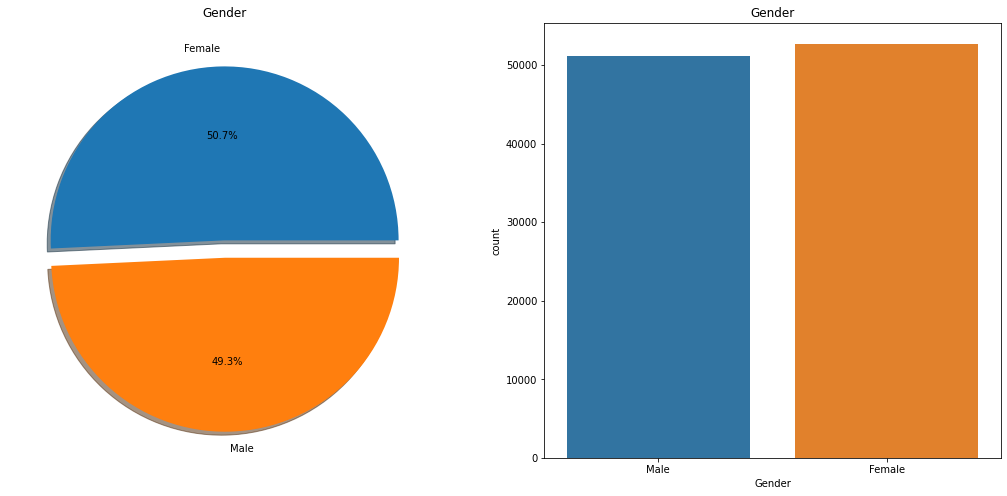

In [10]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train['Gender'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Gender')
ax[0].set_ylabel('')
sns.countplot('Gender',data=train,ax=ax[1])
ax[1].set_title('Gender')
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Density'>

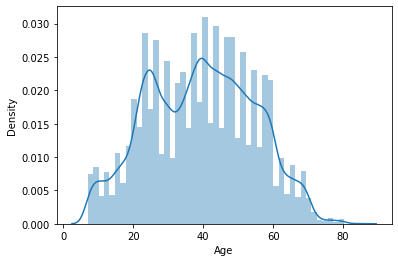

In [11]:
sns.distplot(train['Age'])

<AxesSubplot:xlabel='Age', ylabel='Density'>

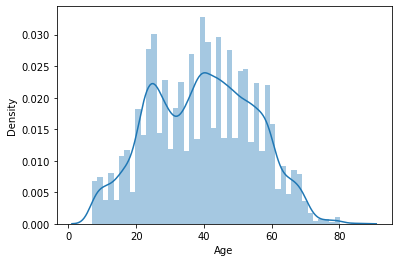

In [12]:
sns.distplot(test['Age'])

In [13]:
numerical_features = train.select_dtypes(exclude=['object'])
numerical_features.columns


Index(['id', 'Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')

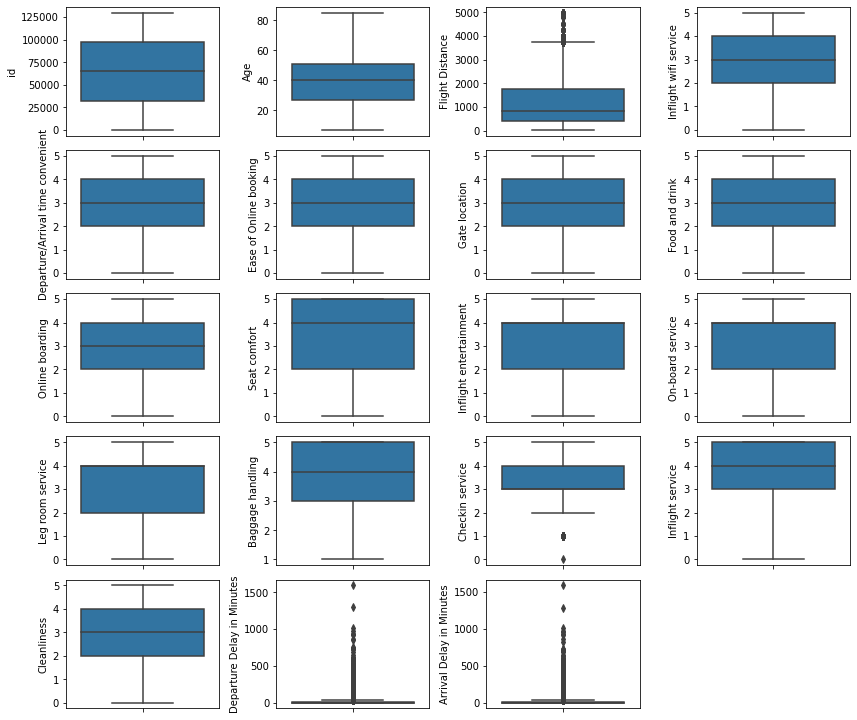

In [14]:
fig = plt.figure(figsize=(12,18))
for i in range(len(numerical_features.columns)):
    fig.add_subplot(9,4,i+1)
    sns.boxplot(y=numerical_features.iloc[:,i])

plt.tight_layout()
plt.show()

An outlier is an observation that lies an abnormal distance from other values in a random sample from a population. Outliers for each feature show us what data have in our dataset. 

In [15]:
train.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


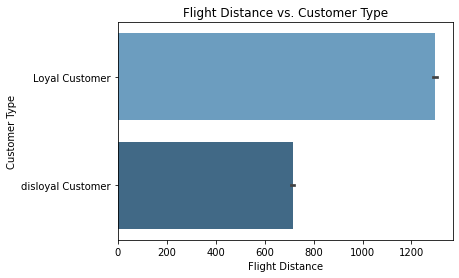

In [16]:
plt.figure(figsize=(6,4))
population_cnt = sns.barplot(train['Flight Distance'],train['Customer Type'], palette="Blues_d")
plt.title('Flight Distance vs. Customer Type')
plt.show()

Graph shows use comparing Flight Distance and Customer type. It is obvious that mostly loyal costumer type prefer long distance.

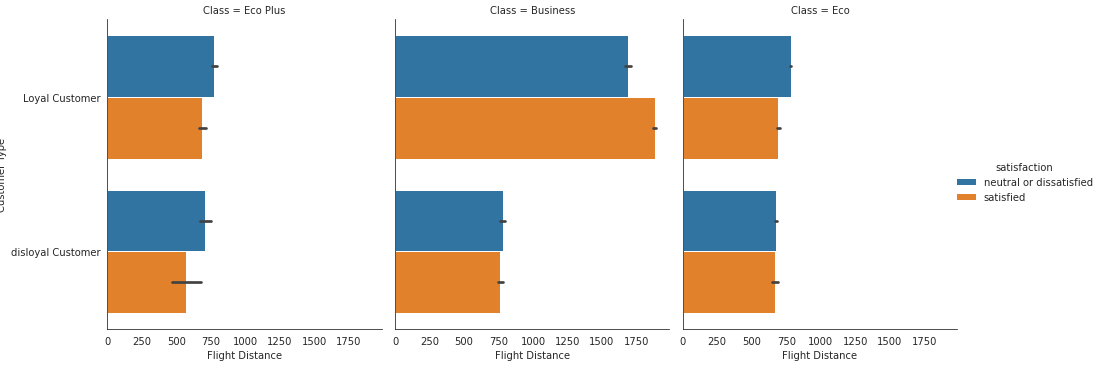

In [17]:
with sns.axes_style('white'):
    g = sns.catplot(x="Flight Distance", y="Customer Type", hue="satisfaction", col="Class", data=train, kind="bar", height=5, aspect=.9)

Business clas for loyal customer is satisy with condition.

# Check data

In [18]:
train.shape

(103904, 24)

In [19]:
test.shape

(25976, 24)

In [20]:
train.isna().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [21]:
test.isna().sum()

id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

<AxesSubplot:>

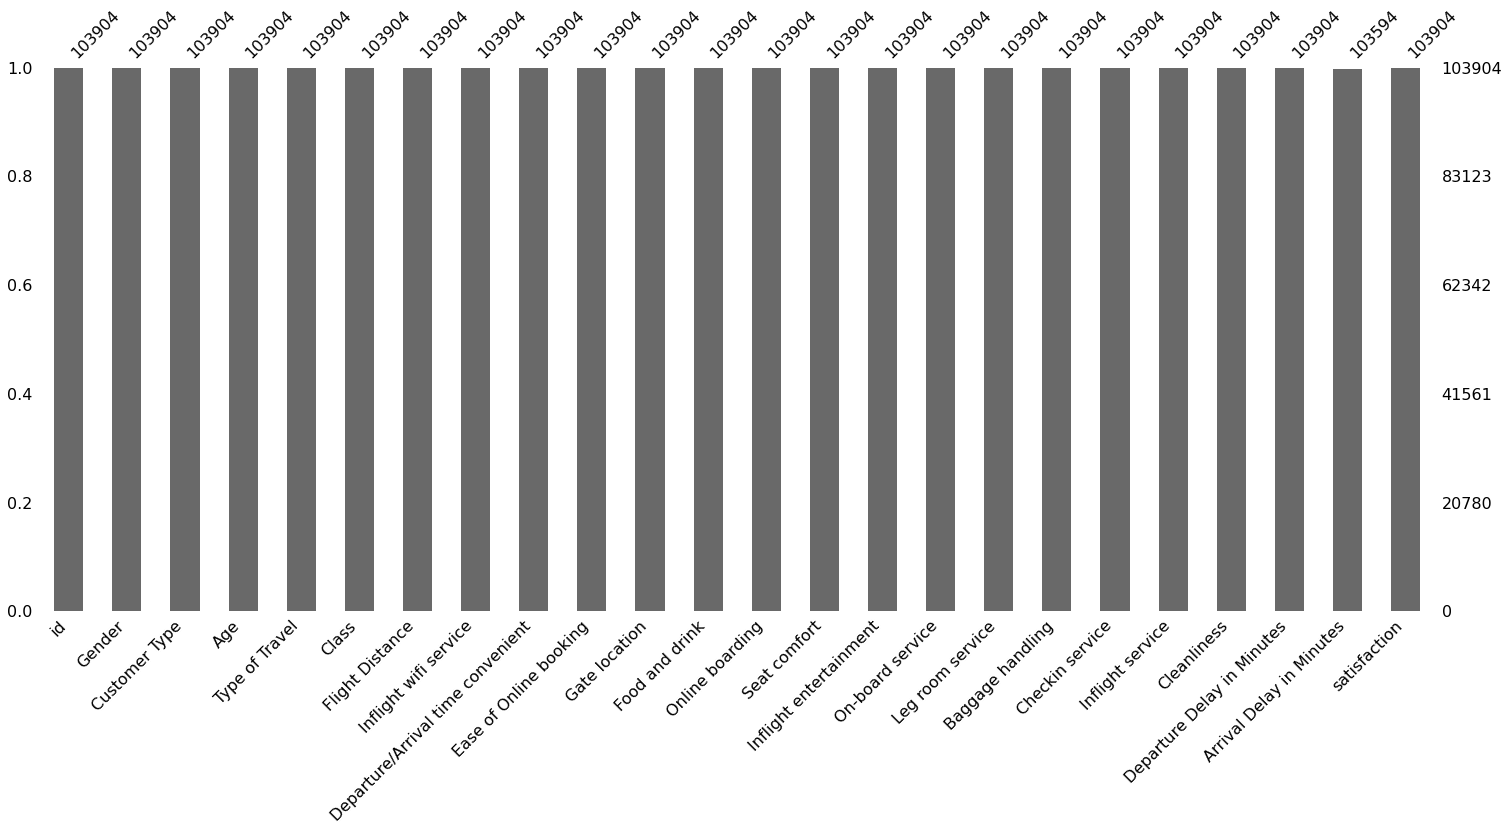

In [22]:
# The most basic plot for visualizing missing values is the bar chart.
msno.bar(train)

<AxesSubplot:>

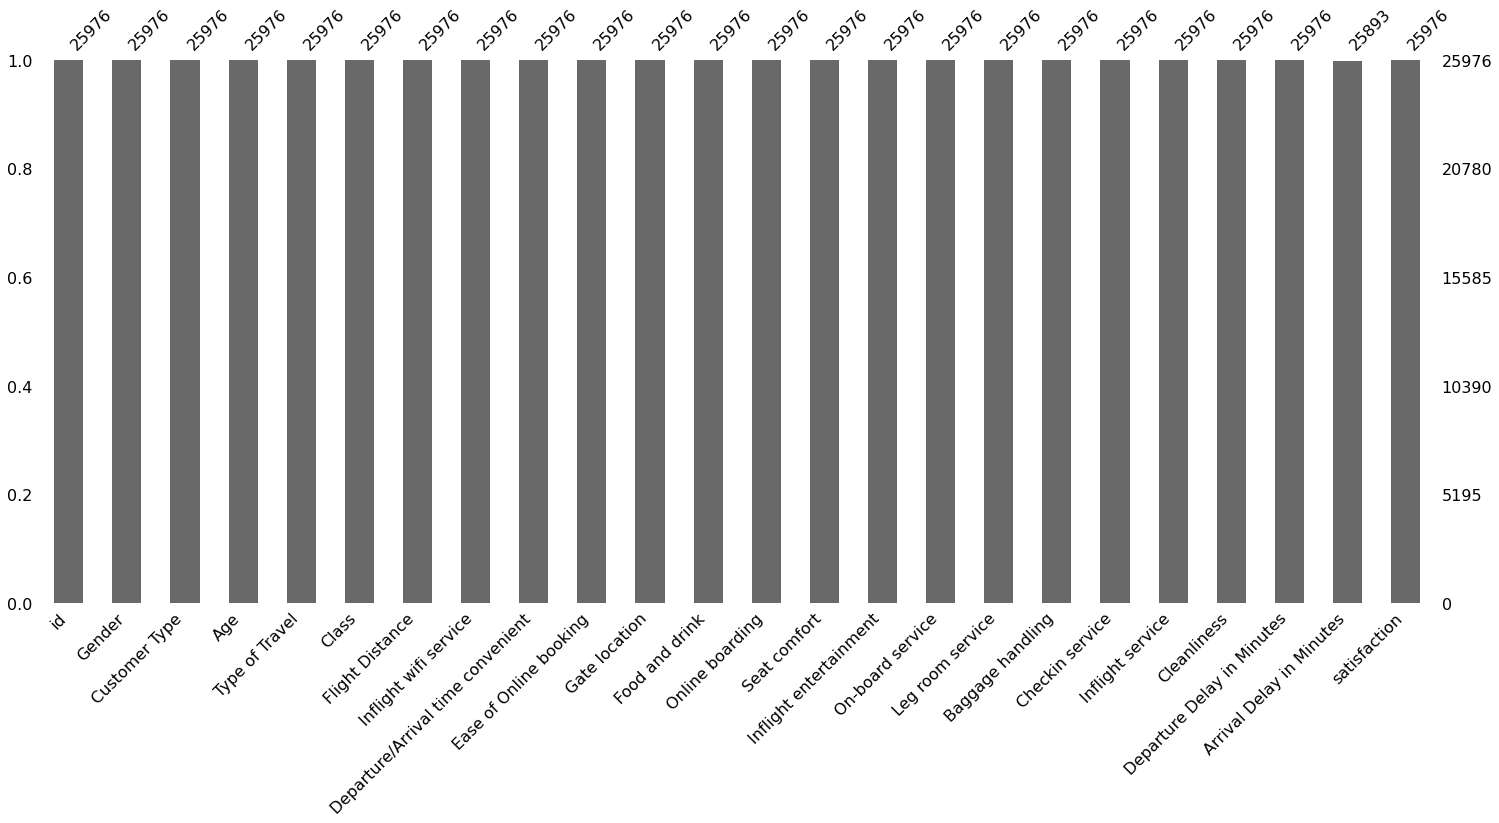

In [23]:
# # The bar chart for test dataset
msno.bar(test)

From the train and test datasets, we can see that the Arrival Delay in Minutes feature likely to have missing values. Our data is very big and that is why missing values do not view in partuclar. So Our train data has **103904** data and Arrival Delay in Minutes has **103594** values. 

<AxesSubplot:>

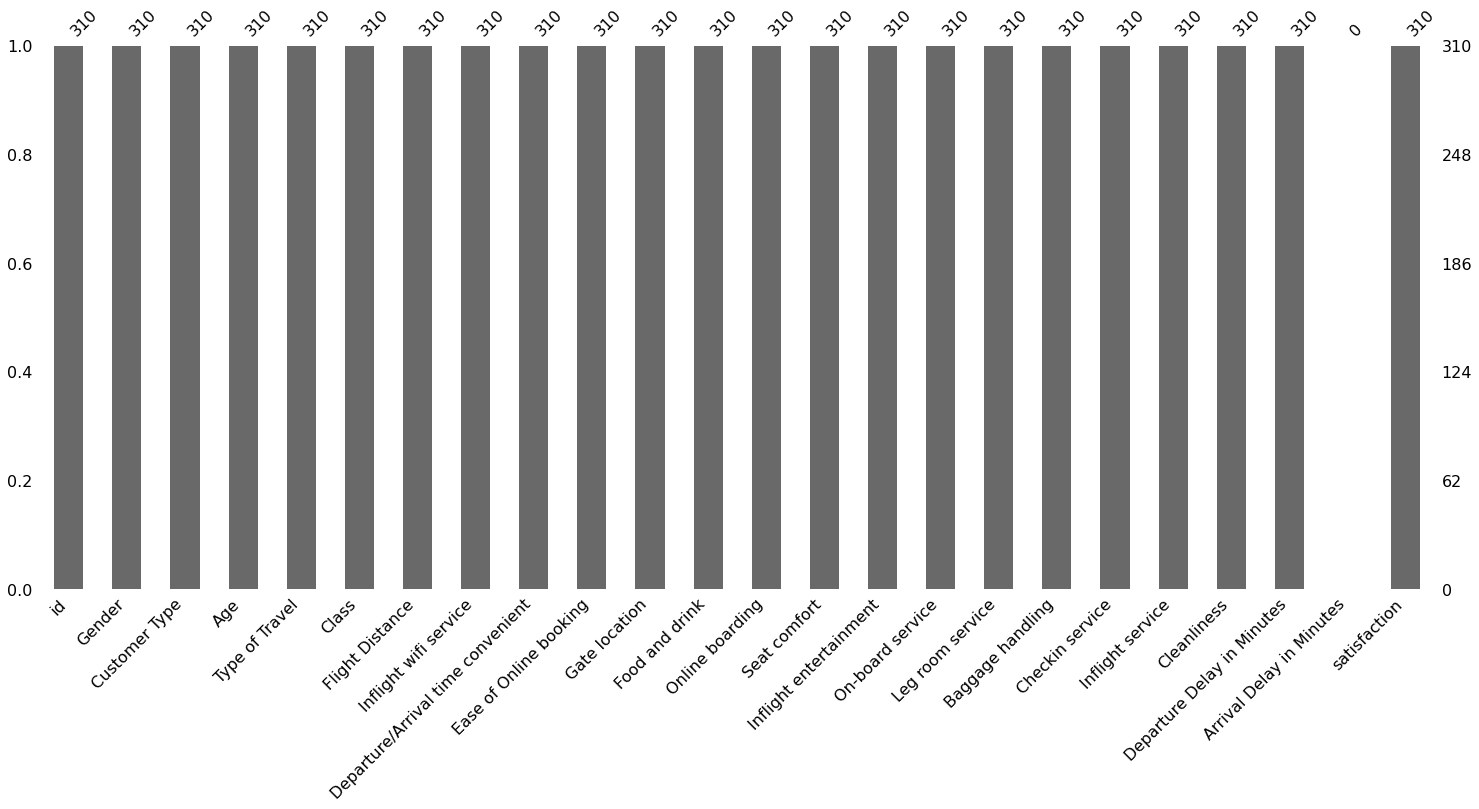

In [24]:
train_miss = train[train.isna().any(axis=1)]
msno.bar(train_miss)

Trying to create new dataframe with miss values, obviously we see missing table in bar chart. 

<AxesSubplot:>

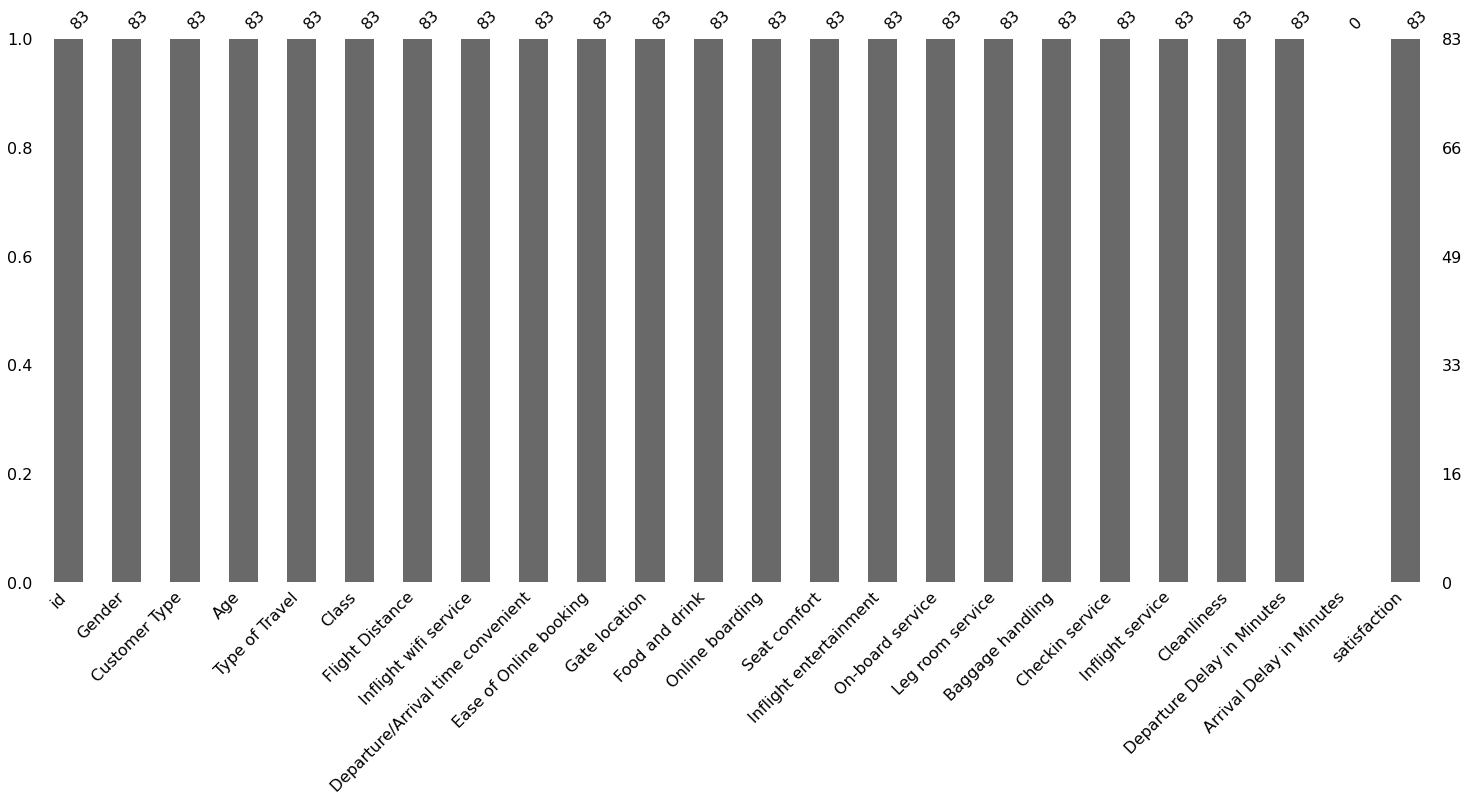

In [25]:
test_miss = test[test.isna().any(axis=1)]
msno.bar(test_miss)

In [26]:
train.dtypes

id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival De

In [27]:
test.dtypes

id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival De

Our datasets have objects features. Need change the data type of the objects to int datatypes.

# Preprocessing

In [28]:
# Encoding categorical data for train

def datatype(df):
    """ iterate through all the columns of a dataframe and change the data type
        of object.        
    """     
    
    for i in df.columns:
        if(df[i].dtype == np.object):
            df[i] = df[i].astype('category')
            df[i] = df[i].cat.codes
    print(object)

In [29]:
datatype(train)
datatype(test)

<class 'object'>
<class 'object'>


In [30]:
train.dtypes

id                                     int64
Gender                                  int8
Customer Type                           int8
Age                                    int64
Type of Travel                          int8
Class                                   int8
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival De

In [31]:
test.dtypes

id                                     int64
Gender                                  int8
Customer Type                           int8
Age                                    int64
Type of Travel                          int8
Class                                   int8
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival De

In [32]:
# Replace train none value with mean
train['Arrival Delay in Minutes'].fillna((train['Arrival Delay in Minutes'].mean()), inplace=True)

In [33]:
train.isna().sum().sum()

0

In [34]:
# Replace test none value with mean
test['Arrival Delay in Minutes'].fillna((test['Arrival Delay in Minutes'].mean()), inplace=True)

In [35]:
test.isna().sum().sum()

0

In [36]:
# Correlation between features for train
train_corr  = train.corr(method='pearson').abs()
train_corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,1.00,0.00,0.00,0.02,0.00,0.10,0.10,0.02,0.00,0.01,0.00,0.00,0.06,0.05,0.00,0.06,0.04,0.07,0.08,0.08,0.02,0.02,0.04,0.01
Gender,0.00,1.00,0.03,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.00,0.01,0.04,0.03,0.01,0.01,0.03,0.04,0.01,0.04,0.01,0.00,0.00,0.01
Customer Type,0.00,0.03,1.00,0.28,0.31,0.04,0.23,0.01,0.21,0.02,0.01,0.06,0.19,0.16,0.11,0.06,0.05,0.02,0.03,0.02,0.08,0.00,0.00,0.19
Age,0.02,0.01,0.28,1.00,0.05,0.12,0.10,0.02,0.04,0.02,0.00,0.02,0.21,0.16,0.08,0.06,0.04,0.05,0.04,0.05,0.05,0.01,0.01,0.14
Type of Travel,0.00,0.01,0.31,0.05,1.00,0.49,0.27,0.11,0.26,0.13,0.03,0.06,0.22,0.12,0.15,0.06,0.14,0.03,0.02,0.02,0.08,0.01,0.01,0.45
Class,0.10,0.01,0.04,0.12,0.49,1.00,0.43,0.02,0.09,0.09,0.00,0.08,0.30,0.21,0.18,0.21,0.20,0.16,0.16,0.16,0.13,0.01,0.01,0.45
Flight Distance,0.10,0.01,0.23,0.10,0.27,0.43,1.00,0.01,0.02,0.07,0.00,0.06,0.21,0.16,0.13,0.11,0.13,0.06,0.07,0.06,0.09,0.00,0.00,0.30
Inflight wifi service,0.02,0.01,0.01,0.02,0.11,0.02,0.01,1.00,0.34,0.72,0.34,0.13,0.46,0.12,0.21,0.12,0.16,0.12,0.04,0.11,0.13,0.02,0.02,0.28
Departure/Arrival time convenient,0.00,0.01,0.21,0.04,0.26,0.09,0.02,0.34,1.00,0.44,0.44,0.00,0.07,0.01,0.00,0.07,0.01,0.07,0.09,0.07,0.01,0.00,0.00,0.05
Ease of Online booking,0.01,0.01,0.02,0.02,0.13,0.09,0.07,0.72,0.44,1.00,0.46,0.03,0.40,0.03,0.05,0.04,0.11,0.04,0.01,0.04,0.02,0.01,0.01,0.17


In [37]:
# drop out highly correlated features for train
upper_tri = train_corr.where(np.triu(np.ones(train_corr.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]
to_drop1 = [column for column in upper_tri.columns if any(upper_tri[column] < -0.5)]
print('More than 0.8 is: ', to_drop, '\n less than -0.5 is: ', to_drop1)
traindrop = train.drop(to_drop, axis=1)
train_corrs  = traindrop.corr(method='pearson').style.background_gradient(cmap='coolwarm').set_precision(2)
train_corrs

More than 0.8 is:  ['Arrival Delay in Minutes'] 
 less than -0.5 is:  []


,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
id,1.00,-0.00,0.00,0.02,0.00,-0.10,0.10,-0.02,-0.00,0.01,-0.00,0.00,0.06,0.05,0.00,0.06,0.04,0.07,0.08,0.08,0.02,-0.02,0.01
Gender,-0.00,1.00,-0.03,0.01,0.01,-0.01,0.01,0.01,0.01,0.01,0.00,0.01,-0.04,-0.03,0.01,0.01,0.03,0.04,0.01,0.04,0.01,0.00,0.01
Customer Type,0.00,-0.03,1.00,-0.28,-0.31,0.04,-0.23,-0.01,-0.21,-0.02,0.01,-0.06,-0.19,-0.16,-0.11,-0.06,-0.05,0.02,-0.03,0.02,-0.08,0.00,-0.19
Age,0.02,0.01,-0.28,1.00,-0.05,-0.12,0.10,0.02,0.04,0.02,-0.00,0.02,0.21,0.16,0.08,0.06,0.04,-0.05,0.04,-0.05,0.05,-0.01,0.14
Type of Travel,0.00,0.01,-0.31,-0.05,1.00,0.49,-0.27,-0.11,0.26,-0.13,-0.03,-0.06,-0.22,-0.12,-0.15,-0.06,-0.14,-0.03,0.02,-0.02,-0.08,-0.01,-0.45
Class,-0.10,-0.01,0.04,-0.12,0.49,1.00,-0.43,-0.02,0.09,-0.09,-0.00,-0.08,-0.30,-0.21,-0.18,-0.21,-0.20,-0.16,-0.16,-0.16,-0.13,0.01,-0.45
Flight Distance,0.10,0.01,-0.23,0.10,-0.27,-0.43,1.00,0.01,-0.02,0.07,0.00,0.06,0.21,0.16,0.13,0.11,0.13,0.06,0.07,0.06,0.09,0.00,0.30
Inflight wifi service,-0.02,0.01,-0.01,0.02,-0.11,-0.02,0.01,1.00,0.34,0.72,0.34,0.13,0.46,0.12,0.21,0.12,0.16,0.12,0.04,0.11,0.13,-0.02,0.28
Departure/Arrival time convenient,-0.00,0.01,-0.21,0.04,0.26,0.09,-0.02,0.34,1.00,0.44,0.44,0.00,0.07,0.01,-0.00,0.07,0.01,0.07,0.09,0.07,0.01,0.00,-0.05
Ease of Online booking,0.01,0.01,-0.02,0.02,-0.13,-0.09,0.07,0.72,0.44,1.00,0.46,0.03,0.40,0.03,0.05,0.04,0.11,0.04,0.01,0.04,0.02,-0.01,0.17


In [38]:
# Correlation between features for test
test_corr  = test.corr(method='pearson').abs()
test_corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,1.00,0.00,0.01,0.01,0.01,0.11,0.10,0.03,0.00,0.01,0.00,0.01,0.06,0.05,0.00,0.06,0.04,0.07,0.08,0.08,0.02,0.01,0.03,0.01
Gender,0.00,1.00,0.03,0.01,0.02,0.01,0.01,0.01,0.01,0.00,0.01,0.01,0.06,0.05,0.01,0.00,0.03,0.03,0.00,0.03,0.01,0.01,0.01,0.01
Customer Type,0.01,0.03,1.00,0.29,0.31,0.04,0.23,0.00,0.21,0.01,0.00,0.05,0.19,0.14,0.09,0.04,0.04,0.03,0.03,0.03,0.07,0.00,0.00,0.18
Age,0.01,0.01,0.29,1.00,0.03,0.12,0.10,0.01,0.03,0.01,0.00,0.02,0.20,0.15,0.07,0.05,0.03,0.05,0.03,0.06,0.05,0.00,0.01,0.12
Type of Travel,0.01,0.02,0.31,0.03,1.00,0.49,0.26,0.11,0.25,0.14,0.03,0.09,0.22,0.14,0.17,0.07,0.14,0.04,0.01,0.03,0.11,0.01,0.01,0.45
Class,0.11,0.01,0.04,0.12,0.49,1.00,0.43,0.03,0.08,0.10,0.01,0.10,0.30,0.22,0.20,0.22,0.20,0.18,0.16,0.16,0.14,0.01,0.01,0.44
Flight Distance,0.10,0.01,0.23,0.10,0.26,0.43,1.00,0.01,0.01,0.06,0.01,0.06,0.21,0.16,0.14,0.12,0.14,0.07,0.08,0.07,0.11,0.00,0.00,0.30
Inflight wifi service,0.03,0.01,0.00,0.01,0.11,0.03,0.01,1.00,0.35,0.71,0.35,0.12,0.46,0.12,0.20,0.11,0.16,0.12,0.05,0.11,0.13,0.01,0.01,0.28
Departure/Arrival time convenient,0.00,0.01,0.21,0.03,0.25,0.08,0.01,0.35,1.00,0.44,0.46,0.02,0.08,0.00,0.02,0.06,0.00,0.07,0.08,0.07,0.01,0.00,0.00,0.06
Ease of Online booking,0.01,0.00,0.01,0.01,0.14,0.10,0.06,0.71,0.44,1.00,0.47,0.03,0.41,0.02,0.04,0.04,0.12,0.04,0.00,0.04,0.01,0.00,0.00,0.16


In [39]:
# drop out highly correlated features for test
upper_test = test_corr.where(np.triu(np.ones(test_corr.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_test.columns if any(upper_test[column] > 0.8)]
#to_drop1 = [column for column in upper_tri.columns if any(upper_tri[column] < -0.5)]
print('More than 0.8 is: ', to_drop, '\n less than -0.5 is: ', to_drop1)
testdrop = test.drop(to_drop, axis=1)
train_corrs  = testdrop.corr(method='pearson').style.background_gradient(cmap='coolwarm').set_precision(2)
train_corrs

More than 0.8 is:  ['Arrival Delay in Minutes'] 
 less than -0.5 is:  []


,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
id,1.00,-0.00,0.01,0.01,-0.01,-0.11,0.10,-0.03,-0.00,0.01,0.00,-0.01,0.06,0.05,-0.00,0.06,0.04,0.07,0.08,0.08,0.02,-0.01,0.01
Gender,-0.00,1.00,-0.03,0.01,0.02,-0.01,-0.01,-0.01,0.01,0.00,-0.01,-0.01,-0.06,-0.05,-0.01,-0.00,0.03,0.03,0.00,0.03,-0.01,0.01,0.01
Customer Type,0.01,-0.03,1.00,-0.29,-0.31,0.04,-0.23,0.00,-0.21,-0.01,-0.00,-0.05,-0.19,-0.14,-0.09,-0.04,-0.04,0.03,-0.03,0.03,-0.07,0.00,-0.18
Age,0.01,0.01,-0.29,1.00,-0.03,-0.12,0.10,0.01,0.03,0.01,0.00,0.02,0.20,0.15,0.07,0.05,0.03,-0.05,0.03,-0.06,0.05,-0.00,0.12
Type of Travel,-0.01,0.02,-0.31,-0.03,1.00,0.49,-0.26,-0.11,0.25,-0.14,-0.03,-0.09,-0.22,-0.14,-0.17,-0.07,-0.14,-0.04,0.01,-0.03,-0.11,-0.01,-0.45
Class,-0.11,-0.01,0.04,-0.12,0.49,1.00,-0.43,-0.03,0.08,-0.10,-0.01,-0.10,-0.30,-0.22,-0.20,-0.22,-0.20,-0.18,-0.16,-0.16,-0.14,0.01,-0.44
Flight Distance,0.10,-0.01,-0.23,0.10,-0.26,-0.43,1.00,0.01,-0.01,0.06,0.01,0.06,0.21,0.16,0.14,0.12,0.14,0.07,0.08,0.07,0.11,0.00,0.30
Inflight wifi service,-0.03,-0.01,0.00,0.01,-0.11,-0.03,0.01,1.00,0.35,0.71,0.35,0.12,0.46,0.12,0.20,0.11,0.16,0.12,0.05,0.11,0.13,-0.01,0.28
Departure/Arrival time convenient,-0.00,0.01,-0.21,0.03,0.25,0.08,-0.01,0.35,1.00,0.44,0.46,-0.02,0.08,-0.00,-0.02,0.06,0.00,0.07,0.08,0.07,-0.01,-0.00,-0.06
Ease of Online booking,0.01,0.00,-0.01,0.01,-0.14,-0.10,0.06,0.71,0.44,1.00,0.47,0.03,0.41,0.02,0.04,0.04,0.12,0.04,-0.00,0.04,0.01,-0.00,0.16


In [40]:
# Remove Departure Delay in Minutes
traindrop.drop(['Departure Delay in Minutes'], axis = 1, inplace=True)
testdrop.drop(['Departure Delay in Minutes'], axis = 1, inplace=True)

In [41]:
X_train = traindrop.iloc[:,:-1]
X_train.shape

(103904, 21)

In [42]:
y_train = traindrop["satisfaction"]
y_train.shape

(103904,)

In [43]:
X_test = testdrop.iloc[:,:-1]
X_test.shape

(25976, 21)

In [44]:
y_test = testdrop["satisfaction"]
y_test.shape

(25976,)

### Feature Scaling - StandardScaler

In [45]:
#Scaling the features
cols = X_train.columns

sc_X = StandardScaler()
X_trains = sc_X.fit_transform(X_train)
X_tests = sc_X.transform(X_test)

X_Train = pd.DataFrame(X_trains, columns=[cols])

X_Test = pd.DataFrame(X_tests, columns=[cols])

# Modeling

## KNN

In [46]:
#Fitting the model to calculate accuracy

KNN = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = 2)
KNN.fit(X_Train, y_train)

#Predicting 
y_pred = KNN.predict(X_Test)
# calculating accuracy score
accuracy = KNN.score(X_Test,y_test)
print('Accuracy of the model is',accuracy*100,'%')

Accuracy of the model is 93.03972898059747 %


In [47]:
cm = confusion_matrix(y_test, y_pred)
cm


array([[14049,   524],
       [ 1284, 10119]], dtype=int64)

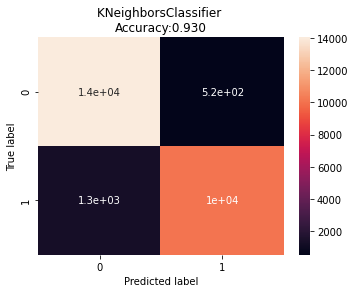

In [48]:
plt.figure(figsize=(5.5,4))
sns.heatmap(cm, annot=True)
plt.title('KNeighborsClassifier \nAccuracy:{0:.3f}'.format(accuracy_score(y_pred,y_test)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [49]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94     14573
           1       0.95      0.89      0.92     11403

    accuracy                           0.93     25976
   macro avg       0.93      0.93      0.93     25976
weighted avg       0.93      0.93      0.93     25976



## Random Forest

In [50]:
# instantiate the classifier 
RF_SS = RandomForestClassifier(random_state=0)


# fit the model
RF_SS.fit(X_Train, y_train)


# Predict the Test set results
y_pred = RF_SS.predict(X_Test)


# Check accuracy score 

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.9653


#### Random Forest Classifier model with 100 Decision Trees 

In [51]:
# instantiate the classifier with n_estimators = 100 with standard scaler
RF_100 = ens.RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set

RF_100.fit(X_Train, y_train)



# Predict on the test set results

y_pred_100 = RF_100.predict(X_Test)



# Check accuracy score 

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.9653


## Visualize feature scores of the features

In [52]:
# create the classifier with n_estimators = 100

clf = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

clf.fit(X_Train, y_train)

RandomForestClassifier(random_state=0)

In [53]:
# view the feature scores

feature_scores = pd.Series(clf.feature_importances_, index=X_Train.columns).sort_values(ascending=False)

feature_scores

Online boarding                      0.172031
Inflight wifi service                0.155744
Type of Travel                       0.107059
Class                                0.086678
Inflight entertainment               0.056875
Seat comfort                         0.047571
Leg room service                     0.036374
Flight Distance                      0.036300
Customer Type                        0.034960
Ease of Online booking               0.034409
id                                   0.031593
Age                                  0.029944
On-board service                     0.027345
Baggage handling                     0.026537
Cleanliness                          0.023285
Checkin service                      0.021867
Inflight service                     0.021852
Gate location                        0.017525
Departure/Arrival time convenient    0.017335
Food and drink                       0.010476
Gender                               0.004240
dtype: float64

In [54]:
# drop the least important feature from X_train and X_test

X_Train_ = X_Train.drop(['Gender'], axis=1)

X_Test_ = X_Test.drop(['Gender'], axis=1)

## Random Forest Classifier with Feature Selection

In [55]:
# instantiate the classifier with n_estimators = 100 with standard scaler
RF_FS = RandomForestClassifier(n_estimators=100, random_state=0)


# fit the model to the training set
RF_FS.fit(X_Train_, y_train)


# Predict on the test set results
y_pred = RF_FS.predict(X_Test_)

# Check accuracy score 

print('Model accuracy score with native_country_41 variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with native_country_41 variable removed : 0.9650


In [56]:
# Print the Confusion Matrix and slice it into four pieces

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[14295   278]
 [  631 10772]]


<AxesSubplot:>

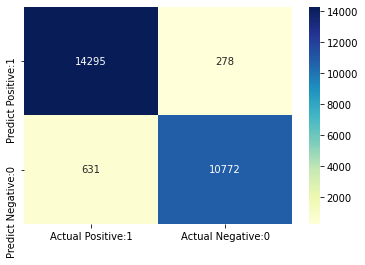

In [57]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14573
           1       0.97      0.94      0.96     11403

    accuracy                           0.97     25976
   macro avg       0.97      0.96      0.96     25976
weighted avg       0.97      0.97      0.96     25976



## K Neighbors Classifier with Feature Selection

In [59]:
#Fitting the model to calculate accuracy
KNN_FS = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = 2)
KNN_FS.fit(X_Train_, y_train)

#Predicting 
y_pred = KNN_FS.predict(X_Test_)

# calculating accuracy score
KNN_FS_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of the model is',KNN_FS_accuracy*100,'%')

Accuracy of the model is 93.40930089313211 %


In [60]:
cm = confusion_matrix(y_test, y_pred)
cm


array([[14074,   499],
       [ 1213, 10190]], dtype=int64)

In [61]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94     14573
           1       0.95      0.89      0.92     11403

    accuracy                           0.93     25976
   macro avg       0.94      0.93      0.93     25976
weighted avg       0.93      0.93      0.93     25976



# Using different algorithm

In [62]:
kfold = KFold(n_splits=10) # k=10, split the data into 10 equal parts

Score=[]
std=[]
classifiers=['GradientBoostingClassifier','Logistic Regression','KNN','Decision Tree','Random Forest',
             'AdaBoostClassifier','SGDClassifier','BaggingClassifier']
models=[GradientBoostingClassifier(),LogisticRegression(),KNeighborsClassifier(n_neighbors=5),DecisionTreeClassifier(),
        RandomForestClassifier(n_estimators=100),AdaBoostClassifier(),SGDClassifier(),BaggingClassifier()]
for i in models:
    model = i
    
    cv_result = cross_val_score(model,X_Train_,y_train, cv = kfold,scoring = "accuracy")
       
    Score.append(cv_result.mean())
    std.append(cv_result.std())
Compare_models=pd.DataFrame({'Accuracy':Score, 'Std':std},index=classifiers)       
Compare_models

,Accuracy,Std
GradientBoostingClassifier,0.944603,0.002783
Logistic Regression,0.875087,0.003006
KNN,0.932929,0.003538
Decision Tree,0.946816,0.001644
Random Forest,0.965228,0.001249
AdaBoostClassifier,0.927943,0.002898
SGDClassifier,0.873123,0.003010
BaggingClassifier,0.959530,0.001714


The model accuracy score Stadard scaler with K-Nearest Neighbors is **93.04**

The Random Forest Classifier model accuracy score with 100 decision-trees is **96.53**. 

Using the Random Forest model to find only the important features and drop out lowest feature score improved acccuracy score with **96.50**  and with KNN is **93.40**

in conclusion Random Forest has high accuracy than other algorithms.